# This notebook calls to the google directions api

In [48]:
# load necessary modules
from matplotlib import pyplot as plt
%matplotlib inline
from weather import get_weather, prep_weather
from datetime import datetime
from route import (query_route_api, extract_route_and_warnings, 
                   get_route, get_pts_near_path)
from mapping import map_predictions
import json
import pandas as pd
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import folium


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
secret_location_goog = '/Users/allisonhonold/.secrets/google_maps_api.json'
secret_loc_weather = "/Users/allisonhonold/.secrets/dark_sky_api.json"

# load weather secret key
with open(secret_loc_weather, "r") as f:
    weather_key = json.load(f)["key"]
    
# set start and end points
start_lat = '40.723011'
start_long = '-73.990142'
end_lat = '40.729625'
end_long = '-73.991106'

start_loc = start_lat + ',' + start_long
end_loc = end_lat + ',' + end_long



In [3]:
today = datetime.today()


In [5]:
route, warning = get_route(secret_location_goog, start_loc, end_loc)

200 OK


In [72]:
type(route)

shapely.geometry.linestring.LineString

In [6]:
weather = get_weather(today, start_lat, start_long, weather_key)


LINESTRING (-73.99039 40.72308, -73.99028 40.72332, -73.99037 40.72334, -73.99091 40.7235, -73.99115 40.72359, -73.99193 40.72381, -73.99267 40.72404, -73.99278 40.72408, -73.99275 40.72415, -73.99267999999999 40.72428, -73.99231 40.72531, -73.99215 40.72575, -73.99167 40.72711, -73.99148 40.72759, -73.99153 40.72762, -73.99149 40.72778, -73.99133999999999 40.72834, -73.99131 40.72839, -73.99119 40.72854, -73.99119 40.72858, -73.99119 40.72866, -73.99096 40.72929, -73.99088999999999 40.72959)
{'latitude': 40.723011, 'longitude': -73.990142, 'timezone': 'America/New_York', 'daily': {'data': [{'time': 1573102800, 'summary': 'Light rain starting in the afternoon.', 'icon': 'rain', 'sunriseTime': 1573126500, 'sunsetTime': 1573163220, 'moonPhase': 0.36, 'precipIntensity': 0.0064, 'precipIntensityMax': 0.0404, 'precipIntensityMaxTime': 1573168020, 'precipProbability': 0.9, 'precipType': 'rain', 'temperatureHigh': 60.27, 'temperatureHighTime': 1573158300, 'temperatureLow': 33.98, 'temperature

NameError: name 'pd' is not defined

In [84]:
# if route == 'error':
#     print('error')

weather_df = prep_weather(weather['daily']['data'][0], today)
# pts = get_pts_near_path(route, 500)
#     arrest_probas = get_arrest_probas(pts, weather_df)
pts_proba_df = pd.concat([pts, pd.Series(arrest_proba, name='probability')], axis='columns')
m = map_predictions(start_lat, start_long, end_lat, end_long, pts_proba_df)
m
# overall_risk = overall_risk (arrest_probas)

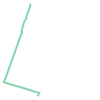

In [74]:
route

In [67]:
m = map_predictions(start_lat, start_long, end_lat, end_long, pts_proba_df)
m

In [80]:
arrest_proba = [0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                0.2, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0,
                0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1, 0.1,
                0.0, 0.5, 0.1, 0.0, 0.1, 0.0, 0.9, 0.0, 0.0, 0.1, 0.0, 0.3, 0.0,
                0.1, 0.2, 0.2, 0.0, 0.2, 0.3, 0.0]

In [61]:
m = map_predictions(start_lat, start_long, end_lat, end_long, pts_proba_df)
m

In [78]:
pts = pd.read_csv('practice_route_pts.csv')


In [81]:
pts_proba_df = pd.concat([pts, pd.Series(arrest_proba, name='probability')], axis='columns')
print(pts_proba_df)

    latitude  longitude                                      geometry  \
0     40.722    -73.993  POINT (-73.99299999999999 40.72199999999999)   
1     40.722    -73.992  POINT (-73.99199999999999 40.72199999999999)   
2     40.722    -73.991             POINT (-73.991 40.72199999999999)   
3     40.722    -73.990  POINT (-73.98999999999999 40.72199999999999)   
4     40.722    -73.989             POINT (-73.989 40.72199999999999)   
5     40.723    -73.995             POINT (-73.99499999999999 40.723)   
6     40.723    -73.994             POINT (-73.99399999999999 40.723)   
7     40.723    -73.993             POINT (-73.99299999999999 40.723)   
8     40.723    -73.992             POINT (-73.99199999999999 40.723)   
9     40.723    -73.991                        POINT (-73.991 40.723)   
10    40.723    -73.990             POINT (-73.98999999999999 40.723)   
11    40.723    -73.989                        POINT (-73.989 40.723)   
12    40.723    -73.988                        POIN

In [53]:
gboxes_proba = gpd.GeoDataFrame(gpts_proba.loc[:, [0, 'box']], geometry=gpts_proba['box'])

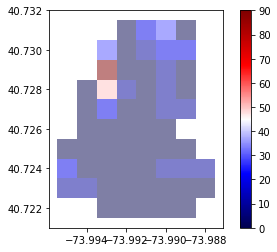

In [58]:
fig, ax = plt.subplots()
gboxes_proba.plot(column=0, 
                  ax=ax, 
                  legend=True, 
                  cmap='seismic', 
                  alpha=.5);